In [135]:
import csv
import pandas as  pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os 
import datetime 
from pathlib import Path

from ipywidgets import widgets, interactive

In [136]:
data_file = os.path.join('./../data/banned_books_clean.pickle')
data = pd.read_pickle(data_file)
display(data.columns.tolist())

['ID',
 'author',
 'title',
 'challenge_type',
 'challenger',
 'decision',
 'library_type',
 'day',
 'month',
 'year',
 'challenge_date',
 'state']

In [137]:
challenged_authors = data.groupby('author')['ID'].nunique()
most_challenged_author = challenged_authors.sort_values(ascending=False).index[0]
last, first = most_challenged_author.replace(" ", "").split(',')

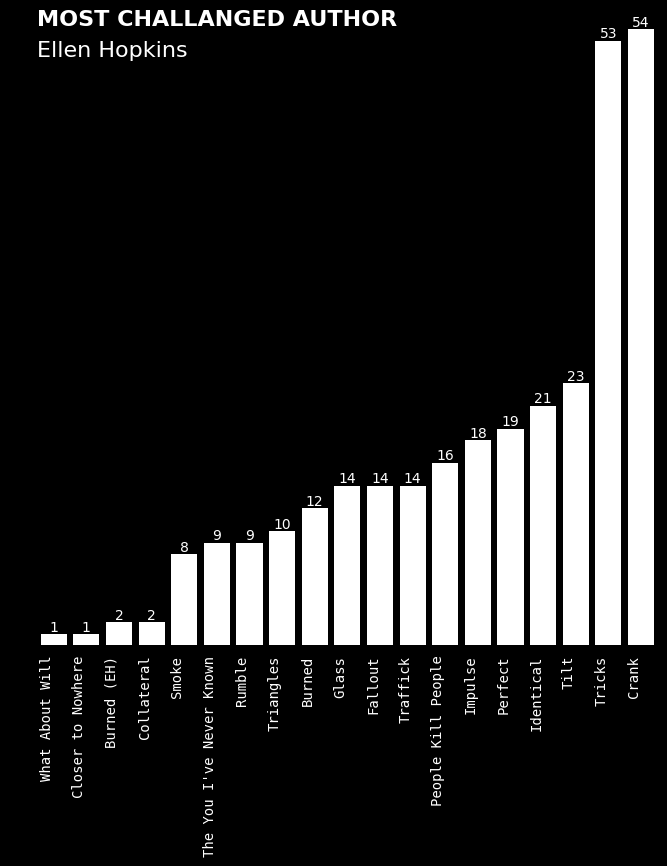

In [138]:
challenged_books = data \
    .loc[data['author'] == most_challenged_author] \
    .groupby('title')['ID'] \
    .nunique() \
    .sort_values(ascending=True)


x_values = 0.5 + np.arange(len(challenged_books))
max_y = max(challenged_books)

fig = plt.figure(figsize=(8, 8), facecolor='black')
ax = plt.subplot(frameon=False)

bars = []
for index, item in enumerate(challenged_books.items()):
    name, number_of_challanges = item
    
    bar = ax.bar(x_values[index], number_of_challanges, color="w", label=name)
    ax.bar_label(ax.containers[-1], label_type='edge', rotation=0, color='white', fontsize=10)
    bars.append(bar)

labels = [name for name, _ in challenged_books.items()]
ax.set_xticks(x_values)
ax.set_xticklabels(labels, color="white", rotation=90, ha="right", family="monospace")
    
ax.set(xlim=(0, len(challenged_books)), ylim=(0, max_y))
ax.text(0, 0.95, f'{first} {last}', transform=ax.transAxes,
        ha="left", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0, 1, "MOST CHALLANGED AUTHOR", transform=ax.transAxes,
        ha="left", va="bottom", color="w",
        family="sans-serif", fontweight="bold", fontsize=16)


plt.show()

In [175]:
def plot_author(author, save=False, name=""):
    last, first = author.replace(" ", "").split(',')
    
    books = data \
        .loc[data['author'] == author] \
        .groupby('title')['ID'] \
        .nunique() \
        .sort_values(ascending=True)
    
    x_values = 0.5 + np.arange(len(books))
    max_y = max(books)
    
    fig1 = plt.figure(figsize=(8, 4), facecolor='black')
    ax1 = plt.subplot(frameon=False)
    ax1.set(xlim=(0, len(books)), ylim=(0, max_y))
    
    bars = []
    for index, item in enumerate(books.items()):
        name, number_of_challanges = item
        bar = ax1.bar(x_values[index], number_of_challanges, color="w", tick_label=name)
        ax1.bar_label(ax1.containers[-1], label_type='edge', rotation=0, color='white', fontsize=10)
        bars.append(bar)
    

    labels = [name for name, _ in books.items()]
    ax1.set_xticks(x_values)
    ax1.set_xticklabels(labels, color="white", rotation=50, fontweight="normal", ha="right", family="monospace")
    
    ax1.text(0, 1.05, f'{first} {last}', transform=ax1.transAxes,
            ha="left", va="bottom", color="w",
            family="sans-serif", fontweight="light", fontsize=16)
    # ax1.text(0, 1.05, "CHALLENGED AUTHOR", transform=ax1.transAxes,
    #         ha="left", va="bottom", color="w",
    #         family="monospace", fontweight="bold", fontsize=16)

    ax.set_aspect("equal", anchor="SW")

    if save:
        plt.savefig(name, bbox_inches="tight")
    plt.close()

author = widgets.Dropdown(
    options=[f"{i} challenges:{challenges}" for i, challenges in challenged_authors.sort_values(ascending=False).items()],
    description= 'Author:',
    disabled=False,
)

# interactive(lambda author: plot_author(author[:author.index(" challenges")]), author=author)

year
2021    1677
2022    3981
2023    1609
Name: ID, dtype: int64

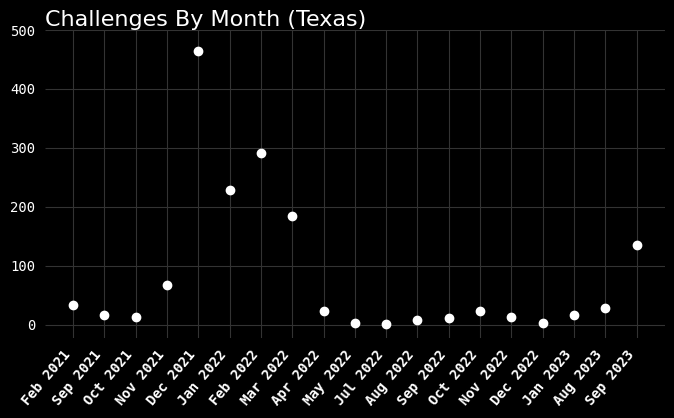

In [168]:
dates = data[data["state"] == "TX"].groupby("challenge_date")["ID"].nunique()

years = data.groupby("year")["ID"].nunique()
display(years)

fig1 = plt.figure(figsize=(8, 4), facecolor='black')
ax1 = plt.subplot(frameon=False)

ax1.grid(True, color="#333333", zorder=-100)
x_values = 0.5 + np.arange(len(dates))


for i, item in enumerate(dates.items()):
    ax1.scatter(x_values[i], item[1], zorder=100, color="white")


labels = [date.strftime("%b %Y") for date, _ in dates.items()]
ax1.set_xticks(x_values)
ax.set_xticks( years, minor=True )
ax1.set_xticklabels(labels, color="white", rotation=50, fontweight="bold", ha="right", family="monospace")

y_ticks = np.arange(0, max(dates.tolist())+100, 100)
plt.yticks(y_ticks)
ax1.set_yticklabels(y_ticks, color="white", fontweight="normal", ha="right", family="monospace")

ax1.text(0, 1, 'Challenges By Month (Texas)', transform=ax1.transAxes,
        ha="left", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=16)


plt.show()

In [169]:
import re
import string
printable = set(string.printable)
conv = {
    '&': r'\&',
    '%': r'\%',
    '$': r'\$',
    '#': r'\#',
    '_': r'\_',
    '{': r'\{',
    '}': r'\}',
    '~': r'\textasciitilde{}',
    '^': r'\^{}',
    '\\': r'\textbackslash{}',
    '<': r'\textless{}',
    '>': r'\textgreater{}',
}
regex = re.compile('|'.join(re.escape(str(key)) for key in sorted(conv.keys(), key = lambda item: - len(item))))

def tex_escape(text):
    """
        :param text: a plain text message
        :return: the message escaped to appear correctly in LaTeX
    """

    sub = regex.sub(lambda match: conv[match.group()], text)
    sub = "".join(filter(lambda x: x in printable, sub))
    return sub


def data_to_latex_table(dataset, col, filename):
    columns = data.columns.tolist()

    lines = []
    lines.extend([
        r"\documentclass{standalone}",
        # r"\usepackage[vcentering,dvips]{geometry}",
        # r"\geometry{papersize={7.444in,9.681in},total={4.8in,6.8in}}",
        r"\usepackage{float}",
        r"\begin{document}",
        # r"\begin{table}[h]",
        fr"\begin{{tabular}}{{| {' '.join(['l|'] * (len(columns) + 1))}}} \hline",
        fr"{' & '.join([column.replace('_', ' ') for column in columns])} \\ \hline"
    ])
    
    for book in dataset:
        row = data.loc[data[col] == book].iloc[0]
        line = []
        for column in columns:
            line.append(tex_escape(str(row[column])))
        lines.append(fr"{' & '.join(line)} \\ \hline")
            
        
    lines.extend([
        r"\end{tabular}",
        # r"\end{table}",
        r"\end{document}"
    ])
    
    # print("\n".join(lines))
    
    with open(Path(filename), "w") as p:
        p.write("\n".join(lines))
        

In [170]:
challenged_books = data.groupby('title')['ID'].nunique()
challenged_authors = data.groupby('author')['ID'].nunique()

number = 50
top_challenged_books = challenged_books.sort_values(ascending=False).index[0:number]
data_to_latex_table(top_challenged_books, "title", "./output/challenged_books.tex")

top_challenged_authors = challenged_authors.sort_values(ascending=False).index[0:number]
data_to_latex_table(top_challenged_authors, "author", "./output/challenged_authors.tex")

In [171]:
num_books = len(data.groupby('title')['ID'].nunique())
print(f"books: {num_books}")

num_authors = len(data.groupby('author')['ID'].nunique())
print(f"authors: {num_authors}")

num_states = len(data.groupby('state')['ID'].nunique())
print(f"states: {num_states}")

num_months = len(data.groupby('month')['ID'].nunique())
print(f"months: {num_months}")

print(data.groupby("year")["ID"].nunique())
print(len(data))


books: 2634
authors: 1780
states: 49
months: 12
year
2021    1677
2022    3981
2023    1609
Name: ID, dtype: int64
7267


/var/folders/96/vvm7jrcd1m939v6rphwj8n800000gn/T/ipykernel_62628/3733689963.py:39: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing from current font.
  plt.savefig(name, bbox_inches="tight")


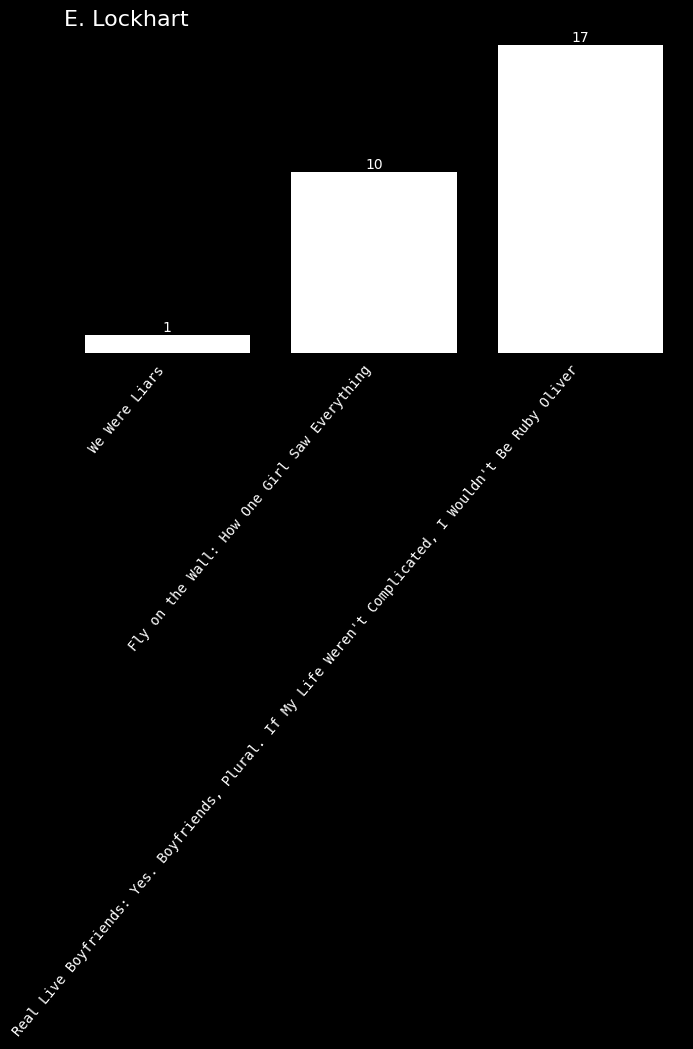

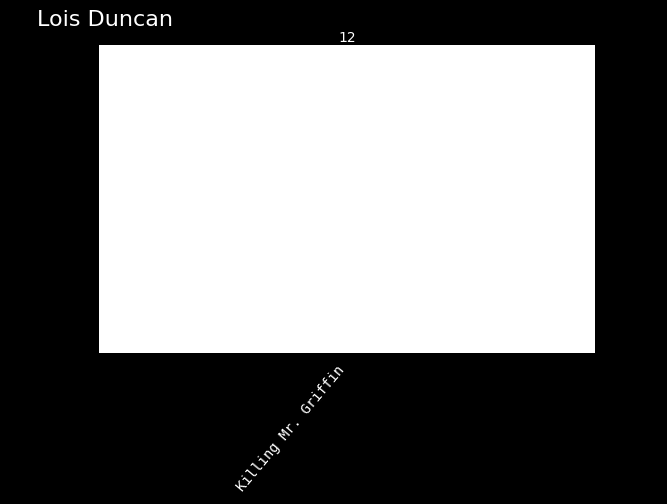

In [177]:
top_challenged_authors = challenged_authors.sort_values(ascending=False).index[0:150]


for author in top_challenged_authors:
    author = "".join(filter(lambda x: x in printable, str(author)))
    try:
        plot_author(author, save=True, name=Path(f"./output/graphs/{author}").absolute())
    except Exception:
        pass